In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# 6.13

In [20]:
np.random.seed(15)

n = 20;  # dimension of x's
M = 25;  # number of non-censored data points
K = 100; # total number of points
c_true = np.random.randn(n,1)
X = np.random.randn(n,K)
y = np.dot(np.transpose(X),c_true) + 0.1*(np.sqrt(n))*np.random.randn(K,1)

# Reorder measurements, then censor
sort_ind = np.argsort(y.T)
y = np.sort(y.T)
y = y.T
X = X[:, sort_ind.T].squeeze()
D = (y[M-1]+y[M])/2.0
y = y[list(range(M))].squeeze()

# Solve the problem
c = cp.Variable(n)
y_unknown = cp.Variable(K-M)
obj = cp.Minimize(cp.norm(X.T@c - cp.hstack((y,y_unknown)),2))
constraints = [ y_unknown <= D]
prob = cp.Problem(obj, constraints)
prob.solve()
c_opt = c.value
print(f'Optimal c using method from a) is {c_opt}')

obj = cp.Minimize(cp.norm((X.T@c)[:M] - y,2))
prob = cp.Problem(obj, [])
prob.solve()
c_ls = c.value
print(f'Least squares c is {c_ls}')

c_true_norm = np.linalg.norm(c_true,2)
print(f'Relative error in c_opt is {np.linalg.norm(c_opt-c_true,2)/c_true_norm}')
print(f'Relative error in c_ls is {np.linalg.norm(c_ls-c_true,2)/c_true_norm}')


Optimal c using method from a) is [-0.47557676  0.71221567 -0.25756998 -0.02114278 -0.08212428 -0.38345304
 -0.62607701 -0.24325864  0.10489984 -0.59020605 -0.09248647 -0.14229628
  0.56124278  0.3103376  -0.08687633  0.70615666  0.36049526  0.35215354
  0.47524041  0.08107342]
Least squares c is [-0.86949623  0.38779257 -0.07924954 -0.52689695  0.44848029 -2.1460358
 -0.79172669 -0.86627365 -0.18321402 -0.25059169 -0.15833986  0.55531191
  0.42815852  0.06903265 -0.43355176  0.35683189 -0.20242313  2.00710944
  0.81069272  0.09358954]
Relative error in c_opt is 4.522253799917069
Relative error in c_ls is 4.8820948316486765


# 6.19

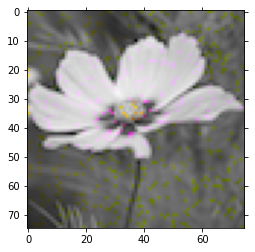

In [2]:

#read in image
import matplotlib.image as mpimg

img = mpimg.imread("flower.png")
img = img[:,:,0:3]
m,n,_ = img.shape

np.random.seed(5)
known_ind = np.where(np.random.rand(m,n) >= 0.90)
# grayscale image
M = 0.299*img[:,:,0]+0.587*img[:,:,1]+0.114*img[:,:,2]
# known color values
R_known = img[:,:,0]
G_known = img[:,:,1]
B_known = img[:,:,2]
R_known = R_known[known_ind]
G_known = G_known[known_ind]
B_known = B_known[known_ind]

def save_img(filename, R,G,B):
  img = np.stack((np.array(R),np.array(G),np.array(B)), axis=2)
  # turn off ticks and labels of the figure
  plt.tick_params(
    axis='both', which='both', labelleft='off', labelbottom='off',
    bottom='off', top='off', right='off', left='off'
  )
  fig = plt.imshow(img)
  plt.savefig(filename,bbox_inches='tight',pad_inches=0.)

R_given = np.copy(M);
R_given[known_ind] = R_known;
G_given = np.copy(M);
G_given[known_ind] = G_known;
B_given = np.copy(M);
B_given[known_ind] = B_known;

save_img("flower_given.png", R_given, G_given, B_given)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


620.7815950227046


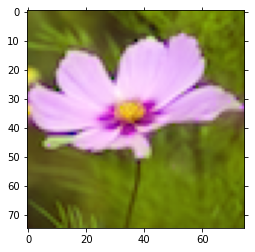

In [11]:
R_var = cp.Variable((m,n))
G_var = cp.Variable((m,n))
B_var = cp.Variable((m,n))

objective = cp.Minimize(cp.tv(R_var,G_var,B_var))
constraints = [
    R_var[known_ind] == R_known,
    G_var[known_ind] == G_known,
    B_var[known_ind] == B_known,
    cp.reshape(R_var,m*n) >= 0,
    cp.reshape(G_var,m*n) >= 0,
    cp.reshape(B_var,m*n) >= 0,
    cp.reshape(R_var,m*n) <= 1,
    cp.reshape(G_var,m*n) <= 1,
    cp.reshape(B_var,m*n) <= 1,
    M == 0.299*R_var+0.587*G_var+0.114*B_var
]

prob = cp.Problem(objective, constraints)
tv_min = prob.solve()
print(tv_min)
save_img("flower_soln.png", R_var.value, G_var.value, B_var.value)

# 8.16

2.903828425976947


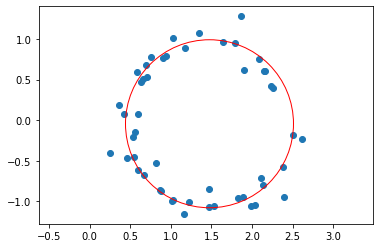

In [37]:
n = 2
m = 50
U = np.array([[1.824183228637652032e+00, 1.349093690455489103e+00, 6.966316403935147727e-01, 7.599387854623529392e-01, 2.388321695850912363e+00, 8.651370608981923116e-01, 1.863922545015865406e+00, 7.099743941474848663e-01, 6.005484882320809570e-01, 4.561429569892232472e-01, 5.328296545713475663e-01, 2.138547819234526415e+00, 1.906676474276197464e+00, 1.015547309536922516e+00, 8.765948388006337133e-01, 1.648147347399247842e+00, 1.027902202451572045e+00, 2.145586297520478691e+00, 1.793440421753045744e+00, 1.020535583041398908e+00, 8.977911075271942654e-01, 1.530480229262339398e+00, 2.478088034137528872e-01, 2.617415807793897820e+00, 2.081978553098443374e+00, 1.891226687205936452e+00, 8.222497927065576251e-01, 5.803514604868882376e-01, 1.158670193449639063e+00, 6.016685032455900695e-01, 5.605410828151705660e-01, 2.508815467550573164e+00, 2.230201413385580977e+00, 1.170848897912992514e+00, 2.256355929901105561e+00, 6.686991510936428629e-01, 2.040269595792217672e+00, 3.634166812924328749e-01, 5.418647611079159265e-01, 6.631470058399455692e-01, 4.286142597532469622e-01, 2.155925078996823618e+00, 2.379380016960549682e+00, 6.343212414048013947e-01, 1.469076407947448981e+00, 1.225322035289937439e+00, 1.467602887401966871e+00, 9.345319187253748883e-01, 1.985592768641736505e+00, 2.106896115090134636e+00],
[-9.644136284187876385e-01, 1.069547315003422927e+00, 6.733229334437943470e-01, 7.788072961810316164e-01, -9.467465278344706636e-01, -8.591303443863639311e-01, 1.279527420871080956e+00, 5.314829019311283487e-01, 6.975676079749143499e-02, -4.641873429414754559e-01, -2.094571396598311763e-01, -8.003479827938377866e-01, 6.135280782546607137e-01, -9.961307468791747999e-01, -8.765215480412106297e-01, 9.655406812422813179e-01, 1.011230180540185541e+00, 6.105416770440197372e-01, 9.486552370654932620e-01, -9.863592657836954825e-01, 7.695327845100754516e-01, -1.060072365810699413e+00, -4.041043465424410952e-01, -2.352952920283236105e-01, 7.560391050507236921e-01, -9.454246095204003053e-01, -5.303145312191936966e-01, 5.979590038743245461e-01, -1.154309511133019717e+00, -6.123184171955468047e-01, -1.464683782538583889e-01, -1.839128688968104386e-01, 4.250070477845909744e-01, 8.861864983476224200e-01, 3.927648421593328276e-01, -6.726102374256350824e-01, -1.047252884197514833e+00, 1.825096825995130845e-01, -4.482373962742914886e-01, 5.115625649313135792e-01, 7.846201103116770548e-02, 6.006325432819290544e-01, -5.710733714464664157e-01, 4.725559971890586075e-01, -8.440290321502940118e-01, -1.003920890712479475e+00, -1.067089412136528637e+00, 7.909281966910661765e-01, -1.059509163675931065e+00, -7.136351632325785843e-01]
])

c = cp.Variable(n)
t = cp.Variable(1)

objective = cp.Minimize(cp.square(cp.norm(np.diag(U.T@U) - t*np.ones(m) - 2*U.T@c)))
constraints = []
prob = cp.Problem(objective, constraints)
res = prob.solve()
r = np.sqrt(t.value + np.sum(np.square(c.value)))
print(res)

fig,ax=plt.subplots()
ax.scatter(U[0], U[1])
cir = plt.Circle(c.value, r, color='r', fill=False)
ax.set_aspect('equal', adjustable='datalim')
ax.add_patch(cir)
plt.show()

# plot a circle with center c and radius r, and plot the points in U on the same plot using matplotlib



# 16.10

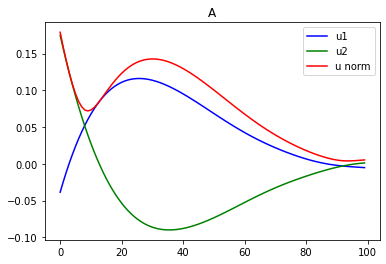

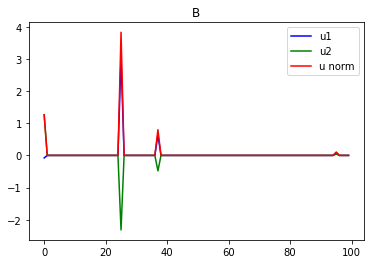

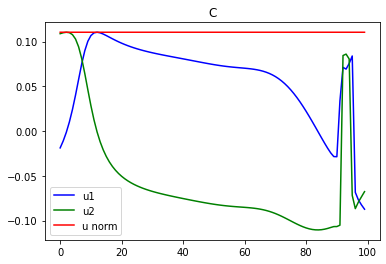

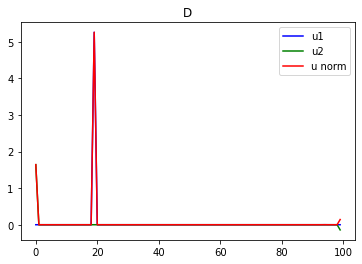

In [92]:
n = 4
m = 2 
A = np.array([
[ 0.95,  0.16,  0.12,  0.01],
[-0.12,  0.98, -0.11, -0.03],
[-0.16,  0.02,  0.98,  0.03],
[-0.  ,  0.02, -0.04,  1.03],
])
B = np.array([
[ 0.8 , 0. ],
[ 0.1 , 0.2],
[ 0.  , 0.8],
[-0.2 , 0.1],
])

T = 100
u = cp.Variable((m,T))
objectives =[cp.sum(cp.square(u)), 
             cp.sum(cp.norm(u, 2, axis=0)),
             cp.max(cp.norm(u, 2, axis=0)), 
             cp.sum(cp.abs(u))]

for i, obj in enumerate(objectives):
    # x = np.ones(n)
    # for j in range(T):
    #     x = A@x + B@u[:,j]
    # constraints = [x == [0]*n]

    x = np.ones(n)
    xs = []
    for j in range(T):
        x = A@x + B@u[:,j]
        xs.append(x)
    constraints = [x == [0]*n]
   
    # x = np.ndarray((T+1,n))
    # x[0] = np.ones(n)
    # for j in range(T):
    #     x[j+1] = A@x[j] + B@u[:,j]
    # constraints = [x[-1] == [0]*n]

    objective = cp.Minimize(obj)
    prob = cp.Problem(objective, constraints)
    res = prob.solve()
    
    # x0 = [xi.value[0] for xi in xs]
    # x1 = [xi.value[1] for xi in xs]
    # x2 = [xi.value[2] for xi in xs]
    # x3 = [xi.value[3] for xi in xs]
    # plt.plot(x0, label='x0')
    # plt.plot(x1, label='x1')
    # plt.plot(x2, label='x2')
    # plt.plot(x3, label='x3')
    plt.plot(u.value[0], label='u1',c='blue')
    plt.plot(u.value[1], label='u2',c='green')
    plt.plot(np.sqrt(np.sum(np.power(u.value, 2), axis=0)), label='u norm', c='r')
    plt.title(chr(65+i))
    plt.legend()
    plt.show()


In [86]:
xs

[array([1.24      , 1.04830874, 2.18323494, 1.17415437]),
 array([1.61945913, 0.60316209, 1.99736105, 1.14301578]),
 array([1.8861056 , 0.14276356, 1.74465408, 1.10947505]),
 array([ 2.03509573, -0.31162058,  1.44412363,  1.07582841]),
 array([ 2.06753477, -0.74072811,  1.11566828,  1.0441059 ]),
 array([ 1.98996278, -1.12806441,  0.77905797,  1.01598779]),
 array([ 1.81362117, -1.46047466,  0.45300111,  0.99274381]),
 array([ 1.55355174, -1.72851215,  0.15433452,  0.97519659]),
 array([ 1.22758432, -1.92660081, -0.10263479,  0.96370886]),
 array([ 0.85526989, -2.05300035, -0.30661634,  0.95819351]),
 array([ 0.45681431, -2.10959073, -0.4496414 ,  0.95814396]),
 array([ 0.05206355, -2.1015004 , -0.52718635,  0.96268212]),
 array([-0.34041523, -2.03660798, -0.53812234,  0.97062003]),
 array([-0.70412023, -1.92495114, -0.48450701,  0.98053136]),
 array([-1.02524192, -1.77807786, -0.37124072,  0.99082856]),
 array([-1.29311288, -1.60837565, -0.2056139 ,  0.99984149]),
 array([-1.50047258,

In [62]:
chr(65)

'A'